In [1]:
# Re-import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset again
file_path = "./cars.csv"
df = pd.read_csv(file_path)
df = df.drop_duplicates()
duplicate_rows_after = df.duplicated().sum()
print(duplicate_rows_after)

# Selecting relevant numerical features
numerical_features = ["Dimensions.Height", "Dimensions.Length", "Dimensions.Width",
                      "Engine Information.Engine Statistics.Horsepower", 
                      "Engine Information.Engine Statistics.Torque", 
                      "Engine Information.Number of Forward Gears"]

# Selecting categorical features for label encoding
categorical_features = ["Engine Information.Driveline", "Engine Information.Engine Type"]

# Encoding categorical variables using Label Encoding
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for later use

# Define target variable (predicting city MPG)
target_variable = "Fuel Information.City mpg"

# Splitting features and target
X = df[numerical_features + categorical_features]
y = df[target_variable]

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing numerical features
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Training the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

r2, mse


0


(0.6122987264807231, np.float64(8.128343845189933))

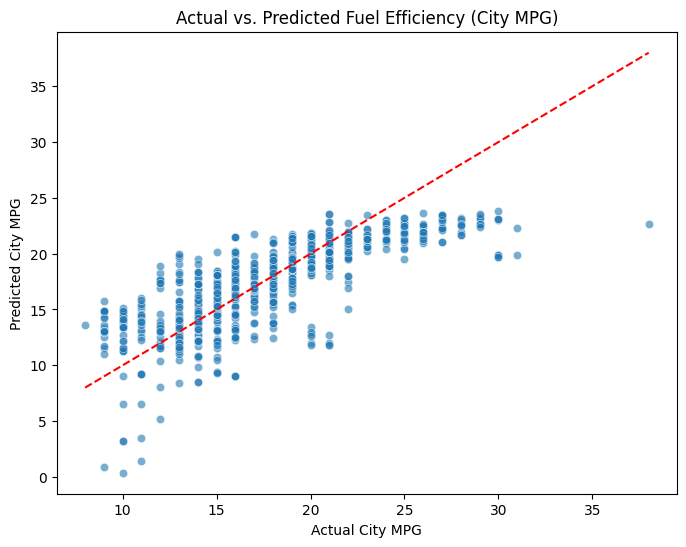

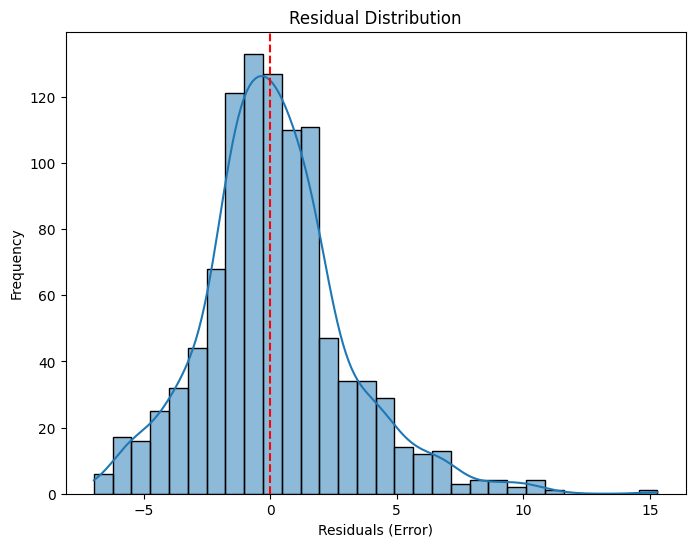

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Actual vs. Predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Perfect fit line
plt.xlabel("Actual City MPG")
plt.ylabel("Predicted City MPG")
plt.title("Actual vs. Predicted Fuel Efficiency (City MPG)")
plt.show()

# Residual Plot
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(x=0, color='red', linestyle='--')  # Center line at zero
plt.xlabel("Residuals (Error)")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()
